In [ ]:
import os
import json
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# create data folder in your Google Drive
data_folder_name = 'openFDA_device_data'
parent_dir = '/content/drive/MyDrive'
data_folder_path = os.path.join(parent_dir, data_folder_name)

os.chdir(parent_dir)

if not os.path.exists(data_folder_path):
  os.mkdir(data_folder_path)
  print(f'{data_folder_path} directory created.')

os.chdir(data_folder_path)

In [ ]:
os.getcwd()

'/content/drive/MyDrive/openFDA_device_data'

**Get Data**

In [ ]:
df = pd.DataFrame()
for i in os.listdir():
  # print(i)
  if i.startswith('device_2023_q2_'):
    device = json.load(open(i))
    device = pd.json_normalize(device['results'])
    df = pd.concat([df, device], ignore_index=True)

device-enforcement-0001-of-0001.json
device-classification-0001-of-0001.json
device-pma-0001-of-0001.json
device-recall-0001-of-0001.json
device-registrationlisting-0001-of-0002.json
device-510k-0001-of-0001.json
device-registrationlisting-0002-of-0002.json
device-udi-0001-of-0041.json
device-udi-0002-of-0041.json
device-udi-0003-of-0041.json
device-udi-0004-of-0041.json
device-udi-0005-of-0041.json
device-udi-0006-of-0041.json
device-udi-0007-of-0041.json
device-udi-0008-of-0041.json
device-udi-0009-of-0041.json
device-udi-0011-of-0041.json
device-udi-0012-of-0041.json
device-udi-0013-of-0041.json
device-udi-0014-of-0041.json
device-udi-0015-of-0041.json
device-udi-0016-of-0041.json
device-udi-0017-of-0041.json
device-udi-0018-of-0041.json
device-udi-0019-of-0041.json
device-udi-0020-of-0041.json
device-udi-0021-of-0041.json
device-udi-0022-of-0041.json
device-udi-0023-of-0041.json
device-udi-0024-of-0041.json
device-udi-0025-of-0041.json
device-udi-0026-of-0041.json
device-udi-0027-o

In [ ]:
#df.to_csv('device_2023_q2.csv')

Features that need to be flattened:
1. type_of_report (List of Strings)
2. source_type (List of Strings)
3. device (List of Dict)
4. device['openfda'] (Dict)
5. product_problems(List of Strings)
6. patient(List of Dict)
7. patient['sequence_number_treatment'] (List of String)
8. patient['sequence_number_outcome'] (List of String)
9. patient['patient_problems'] (List of String)
10. remedial_action (List of String)
11. mdr_text (List of Dict)

In [ ]:
#df = pd.read_csv('device_2023_q2.csv')

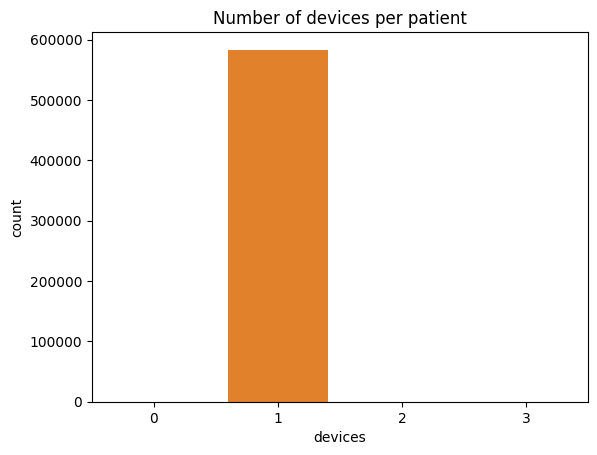

In [ ]:
plot = sns.countplot(x=df['device'].apply(lambda x: len(x))).set_title("Number of devices per patient")
plt.xlabel('devices')
plt.show()

In [ ]:
df['patient'].apply(lambda x: len(x)).value_counts()

1    583293
Name: patient, dtype: int64

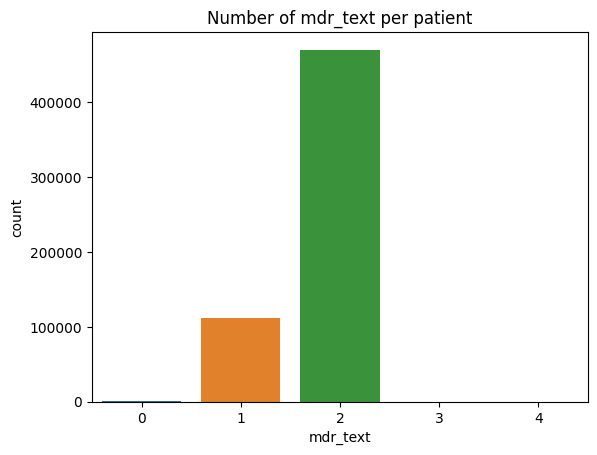

In [ ]:
plot = sns.countplot(x=df['mdr_text'].apply(lambda x: len(x))).set_title("Number of mdr_text per patient")
plt.xlabel('mdr_text')
plt.show()

In [ ]:
df = pd.concat([df, pd.json_normalize(df['patient'].apply(lambda x: x[0]))], axis=1)
df = df.drop(columns=['patient'])

In [ ]:
df = df[df['device'].apply(lambda x: len(x)) == 1].reset_index()
df = pd.concat([df, pd.json_normalize(df['device'].apply(lambda x: x[0]))], axis=1)
df = df.drop(columns=['device'])

In [ ]:
df = df[(df['mdr_text'].apply(lambda x: len(x)) <= 2) & (df['mdr_text'].apply(lambda x: len(x)) >= 1)].reset_index()
part1 = pd.json_normalize(pd.json_normalize(df['mdr_text'])[0])
part1 = part1.add_suffix('_x')
part2 = pd.json_normalize(pd.json_normalize(df['mdr_text'])[1])
part2 = part2.add_suffix('_y')
combine = pd.concat([part1, part2], axis=1)
df = pd.concat([df, combine], axis=1)
df = df.drop(columns=['mdr_text'])

In [ ]:
df.columns

Index(['manufacturer_contact_zip_ext', 'manufacturer_g1_address_2',
       'event_location', 'report_to_fda', 'manufacturer_contact_t_name',
       'manufacturer_contact_state', 'manufacturer_link_flag',
       'manufacturer_contact_address_2', 'manufacturer_g1_city',
       'manufacturer_contact_address_1',
       ...
       'openfda.registration_number', 'openfda.fei_number', 'mdr_text_key_x',
       'text_type_code_x', 'patient_sequence_number_x', 'text_x',
       'mdr_text_key_y', 'text_type_code_y', 'patient_sequence_number_y',
       'text_y'],
      dtype='object', length=137)

In [ ]:
df.to_csv('device_2023_q2.csv', index=False)